In [32]:
import json
import pandas as pd

f = open("results_x.jsonl", "r")

data = []
for line in f:
    data.append(json.loads(line))

f.close()

In [33]:
userQuantity = []
fileQuantity = []
nodeQuantity = []
downloadTimeMean = []

for downloadData in data:
    userQuantity.append(downloadData["cantidad_usuarios"])
    fileQuantity.append(downloadData["cantidad_files"])
    nodeQuantity.append(downloadData["cantidad_nodos"])
    times = downloadData["tiempos_descargas"]
    timeMean = 0
    for time in times:
        timeMean += time
    timeMean /= len(times)
    downloadTimeMean.append(timeMean)

In [34]:
dataset = pd.DataFrame(
    {'cantidad_usuarios': userQuantity,
     'cantidad_files': fileQuantity,
     'cantidad_nodos': nodeQuantity,
     'tiempos_descargas_promedio': downloadTimeMean
    })

dataset

,cantidad_usuarios,cantidad_files,cantidad_nodos,tiempos_descargas_promedio
0,1,1,1,0.325948
1,8,1,1,0.353483
2,16,1,1,0.355297
3,1,1,1,0.316179
4,8,1,1,0.341370
...,...,...,...,...
445,8,1000,1,0.325469
446,16,1000,1,0.334746
447,1,1000,1,0.310282
448,8,1000,1,0.341811


In [35]:
groupedDataset = dataset.groupby(['cantidad_usuarios','cantidad_files','cantidad_nodos'], as_index=False).agg({'tiempos_descargas_promedio':'mean'})

groupedDataset

,cantidad_usuarios,cantidad_files,cantidad_nodos,tiempos_descargas_promedio
0,1,1,1,0.319331
1,1,1,5,0.321342
2,1,1,10,0.318692
3,1,10,1,0.315539
4,1,10,5,0.318434
5,1,10,10,0.316852
6,1,100,1,0.316120
7,1,100,5,0.318320
8,1,100,10,0.316268
9,1,1000,1,0.316906


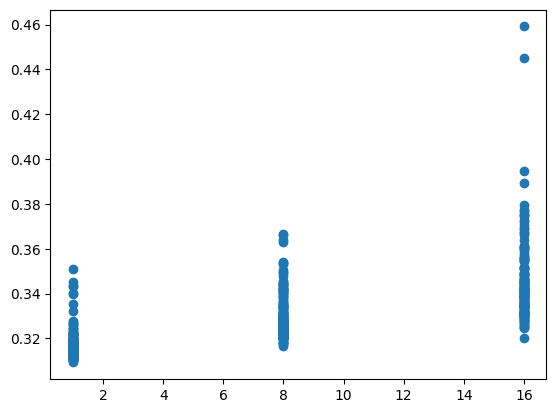

In [36]:
from matplotlib import pyplot as plt

plt.scatter(dataset["cantidad_usuarios"], dataset["tiempos_descargas_promedio"])

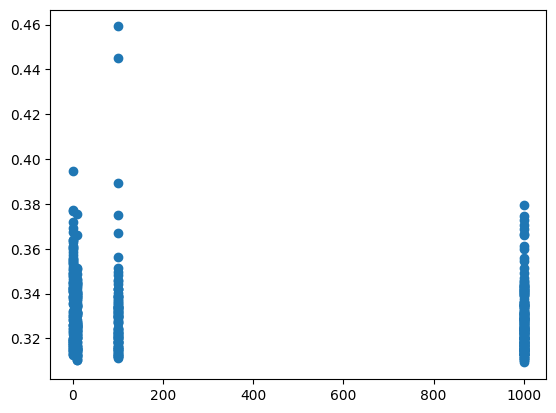

In [37]:
plt.scatter(dataset["cantidad_files"], dataset["tiempos_descargas_promedio"])

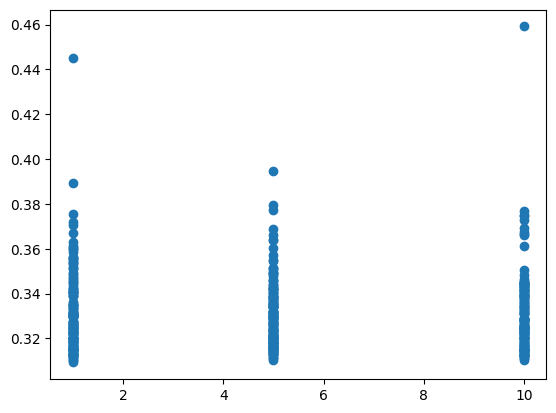

In [38]:
plt.scatter(dataset["cantidad_nodos"], dataset["tiempos_descargas_promedio"])